[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
[3600.0, 3100.0, 4700.0, 5400.0, 5608.0, 4493.0, 3600.0, 3100.0, 4700.0, 5400.0, 5610.0, 4492.0, 3600.0, 3100.0, 4700.0, 5400.0, 6650.0, 7300.0, 7300.0, 6650.0, 7300.0, 6650.0, 5400.0, 8350.0, 7850.0, 9450.0, 10150.0, 10358.0, 9243.0, 8350.0, 7850.0, 9450.0, 10150.0, 10360.0, 9242.0, 8350.0, 7850.0, 9450.0, 10150.0, 11400.0, 12050.0, 12050.0, 11400.0, 12050.0, 11400.0, 10150.0, 13100.0, 12600.0, 14200.0, 14900.0, 15108.0, 13993.0, 13100.0, 12600.0, 14200.0, 14900.0, 15110.0, 13992.0, 13100.0, 12600.0, 14200.0, 14900.0, 16150.0, 16800.0, 16800.0, 16150.0, 16800.0, 16150.0, 14900.0, 19800.0, 19800.0, 19800.0, 19800.0, 200.0, 200.0, 200.0]
[2300.0, 3300.0, 5750.0, 5750.0, 7103.0, 7102.0, 6950.0, 72

Text(0, 0.5, 'Distance')

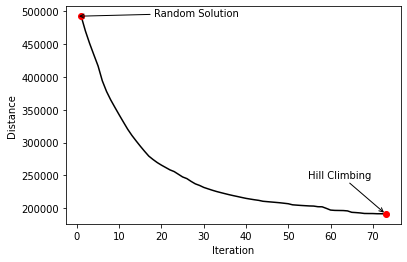

In [1]:
# importing
import csv
import numpy as np
from copy import copy
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
import random
import urllib.request as ul
import re, math, sys
import matplotlib.pyplot as plt
%matplotlib inline

#Reading a file
filename="pr76.tsp"
data = open(filename,'r')

coord_section = False
cord = {}
for line in data.readlines ():
    if re.match ('NODE_COORD_SECTION.*', line):
        coord_section = True
        continue
    elif re.match ('EOF.*', line):
        break
    if coord_section:
        coord = " ".join(line.split())
        coord = coord.split(' ')
        index = int   (coord [0])
        cx    = float (coord [1])
        cy    = float (coord [2])
        cord[index] = (cx, cy)
data.close ()


index=[]
for i,j in enumerate(cord.keys()):
    index.append(j)

def splitListOfTuples(lst):
    lst1 = []
    lst2 = []
    for x, y in lst:
        lst1.append(float(x))
        lst2.append(float(y))
    return (lst1, lst2)

for k in cord.keys():
    for i in cord.get(k):
       x, y = splitListOfTuples(cord.values())

print(index)
print(x)
print(y)

# Functions for distance, matrix forming, length of route
def distance(x1,y1 ,x2,y2):
  dist = np.sqrt(np.square(x1-x2) + np.square(y1-y2))
  return dist

def tsp_matrix(x,y):
  tsp = []
  temp = []
  for i in range(len(x)):
    temp.clear()
    for j in range(len(x)):
      temp.append(distance(x[i],y[i] ,x[j],y[j]))
    t = copy(temp)
    tsp.append(t)
  return tsp

def route_length(tsp, solution):
  length = 0
  for i in range(len(solution)):
    length += tsp[solution[i-1]][solution[i]]
  return length

# calculating for random solution
def random_solution(tsp):
  cities = list(range(len(tsp)))
  result = []

  for i in range(len(tsp)):
    random_city = cities[random.randint(0,len(cities)-1)]
    result.append(random_city)
    cities.remove(random_city)

  return result

tsp = tsp_matrix(x,y)
rands = random_solution(tsp)
print(f"Path for random solution: {random_solution(tsp)}")
print(f"Distance for random solution: {route_length(tsp,rands)}")

# Finding neighbors
def find_neighbors(sol):
  neighbors = []
  for i in range(len(sol)):
    for j in range(i+1,len(sol)):
      a = sol.copy()
      a[i] = sol[j]
      a[j] = sol[i]
      neighbors.append(a)
  return neighbors
solution = random_solution(tsp)

def find_best_neighbor(tsp , neighbors):
  best_neighbor_length = route_length(tsp, neighbors[0]) 
  best_neighbor = neighbors[0]

  for i in neighbors:
    current_length = route_length(tsp , i)
    if current_length < best_neighbor_length :
      best_neighbor_length = current_length
      best_neighbor = i
  
  return best_neighbor, best_neighbor_length
  
# calculating for hill climbing
def hill_climbing(tsp):
  dist = []
  solution = random_solution(tsp)
  length = route_length(tsp,solution)
  neighbors = find_neighbors(solution)
  best_neighbor , best_neighbor_length = find_best_neighbor(tsp , neighbors)
  while best_neighbor_length < length :
    current_solution = best_neighbor
    length = best_neighbor_length
    dist.append(length)
    neighbors = find_neighbors(current_solution)
    best_neighbor , best_neighbor_length = find_best_neighbor(tsp , neighbors)
  return current_solution , length, dist

hill_solution, hill_dist , dist= hill_climbing(tsp) 
print(f"Path for hill climbing is {hill_solution}")
print(f"Distance for hill climbing is {hill_dist}")

result = []
for i in range(0, len(hill_solution)):
  result.append(str(hill_solution[i]))
import pandas as pd
df = pd.DataFrame({"path":result})
df.to_csv("solution.csv",index=False)

iteration = []
def plot_dist(dist): 
  
  for i in range(1,len(dist)+1):
    iteration.append(i)
  plt.plot(iteration, dist, '-', color='black');
tsp = tsp_matrix(x,y)

plot_dist(dist)

x_len = len(iteration) # x-position of annotation
y_len = max(dist) # y-position of annotation

#plot for Random Solution
plt.plot(min(iteration), max(dist), 'o', color='red')
plt.annotate("Random Solution", xy=(0, max(dist)), xytext=(x_len/4,y_len), arrowprops={"arrowstyle":"->", "color":"black"})

#plot for Hill Climbing
plt.plot(max(iteration), min(dist), 'o',color='red')
plt.annotate("Hill Climbing", xy=(max(iteration), min(dist)), xytext=(x_len*0.75, y_len/2), arrowprops={"arrowstyle":"->", "color":"black"})

plt.xlabel("Iteration")
plt.ylabel("Distance")

